In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [2]:
data = pd.read_csv('Dataset .csv')

In [3]:
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [5]:
data.shape

(9551, 21)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [7]:
data.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [8]:
data['Cuisines']

0             French, Japanese, Desserts
1                               Japanese
2       Seafood, Asian, Filipino, Indian
3                        Japanese, Sushi
4                       Japanese, Korean
                      ...               
9546                             Turkish
9547     World Cuisine, Patisserie, Cafe
9548              Italian, World Cuisine
9549                     Restaurant Cafe
9550                                Cafe
Name: Cuisines, Length: 9551, dtype: object

In [9]:
columns = ['City', 'Locality', 'Price range', 'Cuisines', 'Has Table booking', 'Has Online delivery', 'Aggregate rating']
data = data[columns]

In [10]:
data.dropna(inplace=True)

In [11]:
def categorize_rating(rating):
    if rating <= 2.0:
        return 'Poor'
    elif rating <= 3.5:
        return 'Average'
    elif rating <= 4.5:
        return 'Good'
    else:
        return 'Excellent'

data['Rating category'] = data['Aggregate rating'].apply(categorize_rating)

In [12]:
feature_columns = ['City', 'Locality', 'Price range', 'Cuisines', 'Has Table booking', 'Has Online delivery']
target_column = 'Rating category'

In [13]:
numeric_features = ['Price range']
numeric_transformer = StandardScaler()

In [14]:
categorical_features = ['City', 'Locality', 'Cuisines']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

In [15]:
binary_features = ['Has Table booking', 'Has Online delivery']
binary_transformer = OrdinalEncoder()

In [16]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('bin', binary_transformer, binary_features)
    ]
)

In [17]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

In [18]:
X = data[feature_columns]
y = data[target_column]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Price range']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['City', 'Locality',
                                                   'Cuisines']),
                                                 ('bin', OrdinalEncoder(),
                                                  ['Has Table booking',
                                                   'Has Online delivery'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [21]:
y_pred = pipeline.predict(X_test)

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Average       0.67      0.74      0.71       883
   Excellent       0.67      0.05      0.10        39
        Good       0.70      0.69      0.69       555
        Poor       0.69      0.61      0.64       432

    accuracy                           0.68      1909
   macro avg       0.68      0.52      0.53      1909
weighted avg       0.68      0.68      0.68      1909



In [23]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.6820324777370351


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

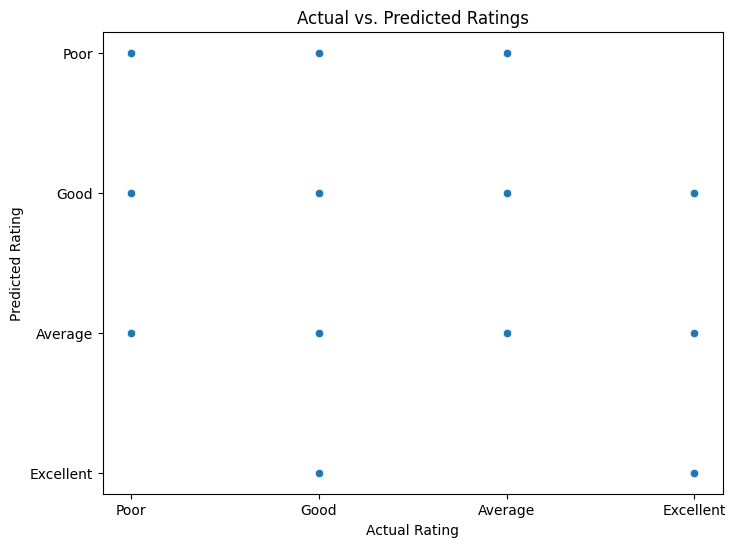

In [25]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Actual vs. Predicted Ratings')
plt.show()

In [26]:
new_data = {
    'City': ['Makati City'],
    'Locality': ['Century City Mall, Poblacion, Makati City'],
    'Price range': [3],
    'Cuisines': ['French, Japanese, Desserts'],
    'Has Table booking': ['Yes'],
    'Has Online delivery': ['No']
}

In [27]:
new_data_df = pd.DataFrame(new_data)

In [28]:
predicted_rating_category = pipeline.predict(new_data_df)
print(f'Predicted Rating Category: {predicted_rating_category[0]}')

Predicted Rating Category: Good


In [29]:
def predict_from_user_input(model_pipeline):
    feature_columns = ['City', 'Locality', 'Price range', 'Cuisines', 'Has Table booking', 'Has Online delivery']
    user_input = {}

    for feature in feature_columns:
        if feature == 'Price range':
            user_input[feature] = int(input(f"Enter value for {feature} (integer): "))
        elif feature in ['Has Table booking', 'Has Online delivery']:
            value = input(f"Does the restaurant have {feature}? (Yes/No): ").strip().capitalize()
            user_input[feature] = value
        else:
            user_input[feature] = input(f"Enter value for {feature}: ").strip()

    user_input_df = pd.DataFrame(user_input, index=[0])

    predicted_rating_category = model_pipeline.predict(user_input_df)[0]

    return predicted_rating_category

predicted_category = predict_from_user_input(pipeline)
print(f"Predicted Rating Category: {predicted_category}")

Enter value for City: bhopal
Enter value for Locality: narela
Enter value for Price range (integer): 2000
Enter value for Cuisines: seafood
Does the restaurant have Has Table booking? (Yes/No): no
Does the restaurant have Has Online delivery? (Yes/No): no
Predicted Rating Category: Good


In [30]:
import pickle

In [32]:
with open('location_based_analysis_pipeline.pkl', 'wb') as file:
    pickle.dump(pipeline, file)

print("Model pipeline saved as 'location_based_analysis_pipeline.pkl'")

Model pipeline saved as 'location_based_analysis_pipeline.pkl'
